# Reduce Dimensionality using Mean and PCA

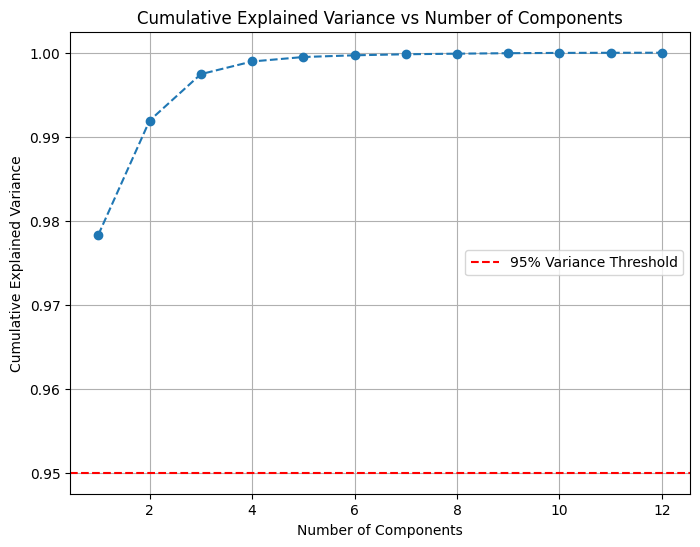

Reduced data (1D, optimal dimensions):
                 PC1
time                
1980-01-31 -0.091103
1980-02-29 -0.216146
1980-03-31  0.071958
1980-04-30  0.015513
1980-05-31 -0.119835


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset (replace 'your_file_path.csv' with your file's path)
file_path = '/kaggle/input/wind-nuts-data/wind_nuts2 (1).csv'
wind_data = pd.read_csv(file_path)

# Convert the 'time' column to datetime and set it as the index
wind_data['time'] = pd.to_datetime(wind_data['time'])
wind_data.set_index('time', inplace=True)

# Resample the data to monthly frequency and compute the mean for each location
monthly_wind_data = wind_data.resample('M').mean()

# Function to determine the optimal number of components based on cumulative variance
def find_optimal_components(data, variance_threshold=0.95):
    """
    Finds the optimal number of PCA components to retain the specified variance threshold.
    
    Parameters:
        data (pd.DataFrame): The input data for PCA.
        variance_threshold (float): The desired variance retention (default is 90%).
    
    Returns:
        int: The optimal number of components.
        PCA: The fitted PCA model.
    """
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    optimal_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    
    # Plot cumulative variance (optional for visualization)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs Number of Components')
    plt.grid()
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold*100:.0f}% Variance Threshold')
    plt.legend()
    plt.show()
    
    return optimal_components, pca

# Find the optimal number of components for 90% variance
variance_threshold = 0.95
optimal_components, pca_model = find_optimal_components(monthly_wind_data, variance_threshold)

# Function to reduce dimensionality using PCA
def reduce_dimensionality(data, n_components, pca_model):
    """
    Reduces dimensionality of the data using PCA.
    
    Parameters:
        data (pd.DataFrame): The input data to reduce.
        n_components (int): The number of components to reduce to.
        pca_model (PCA): The pre-fitted PCA model.
    
    Returns:
        pd.DataFrame: The data with reduced dimensions.
    """
    pca_model.n_components = n_components  # Update PCA model with the selected number of components
    reduced_data = pca_model.fit_transform(data)
    columns = [f'PC{i+1}' for i in range(n_components)]
    return pd.DataFrame(reduced_data, columns=columns, index=data.index)

# Reduce the monthly data to the optimal number of dimensions
reduced_data_optimal = reduce_dimensionality(monthly_wind_data, optimal_components, pca_model)

# Save results or use them for further analysis
reduced_data_optimal.to_csv('reduced_data_optimal.csv')

# Print a preview of the results
print(f"Reduced data ({optimal_components}D, optimal dimensions):")
print(reduced_data_optimal.head())


# Reduce Dimensionality using Seasonality and PCA

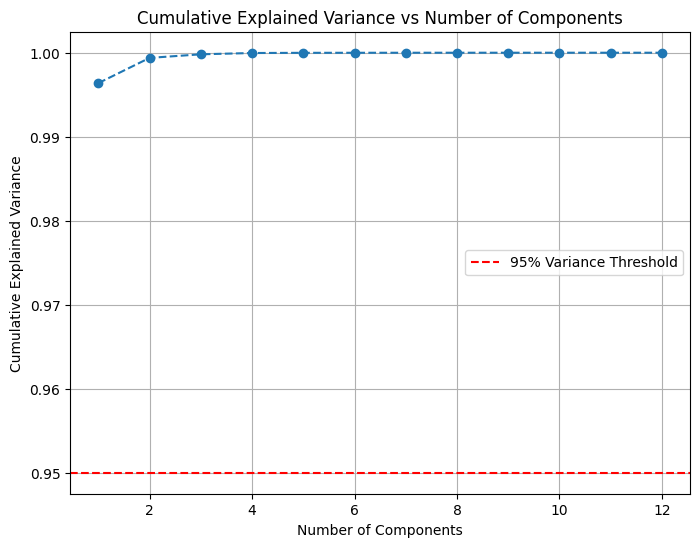

Reduced seasonal data (1D, optimal dimensions):
                 PC1
time                
1980-01-31  0.327430
1980-02-29  0.199927
1980-03-31  0.109160
1980-04-30 -0.117771
1980-05-31 -0.172712


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/kaggle/input/wind-nuts-data/wind_nuts2 (1).csv'
wind_data = pd.read_csv(file_path)

# Convert the 'time' column to datetime and set it as the index
wind_data['time'] = pd.to_datetime(wind_data['time'])
wind_data.set_index('time', inplace=True)

# Step 1: Aggregate data to monthly level
monthly_wind_data = wind_data.resample('M').mean()

# Function to decompose time series and extract seasonal component
def extract_seasonality(data, period):
    """
    Extracts the seasonal component of each column in the data using seasonal decomposition.
    
    Parameters:
        data (pd.DataFrame): Time series data with a DateTime index.
        period (int): The period of seasonality (e.g., 12 for yearly seasonality).
    
    Returns:
        pd.DataFrame: DataFrame of seasonal components for each column.
    """
    seasonal_components = pd.DataFrame(index=data.index)
    for col in data.columns:
        decomposed = seasonal_decompose(data[col], model='additive', period=period, extrapolate_trend='freq')
        seasonal_components[col] = decomposed.seasonal
    return seasonal_components

# Step 2: Extract seasonal components for all locations (using yearly seasonality)
period = 12  # Yearly period for monthly data
seasonal_data = extract_seasonality(monthly_wind_data, period=period)

# Function to find the optimal number of PCA components based on cumulative variance
def find_optimal_components(data, variance_threshold=0.95):
    """
    Finds the optimal number of PCA components to retain the specified variance threshold.
    
    Parameters:
        data (pd.DataFrame): The input data for PCA.
        variance_threshold (float): The desired variance retention (default is 90%).
    
    Returns:
        int: The optimal number of components.
        PCA: The fitted PCA model.
    """
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    optimal_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    
    # Plot cumulative variance (optional for visualization)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs Number of Components')
    plt.grid()
    plt.axhline(y=variance_threshold, color='r', linestyle='--', label=f'{variance_threshold * 100:.0f}% Variance Threshold')
    plt.legend()
    plt.show()
    
    return optimal_components, pca

# Step 3: Find the optimal number of components for 95% variance
variance_threshold = 0.95
optimal_components, pca_model = find_optimal_components(seasonal_data, variance_threshold)

# Function to reduce dimensionality using PCA
def reduce_dimensionality(data, n_components, pca_model):
    """
    Reduces dimensionality of the data using PCA.
    
    Parameters:
        data (pd.DataFrame): The input data to reduce.
        n_components (int): The number of components to reduce to.
        pca_model (PCA): The pre-fitted PCA model.
    
    Returns:
        pd.DataFrame: The data with reduced dimensions.
    """
    pca_model.n_components = n_components  # Update PCA model with the selected number of components
    reduced_data = pca_model.fit_transform(data)
    columns = [f'PC{i+1}' for i in range(n_components)]
    return pd.DataFrame(reduced_data, columns=columns, index=data.index)

# Step 4: Reduce the seasonal data to the optimal number of dimensions
reduced_seasonal_optimal = reduce_dimensionality(seasonal_data, optimal_components, pca_model)

# Save results or use them for further analysis
reduced_seasonal_optimal.to_csv('reduced_seasonal_optimal.csv')

# Print a preview of the results
print(f"Reduced seasonal data ({optimal_components}D, optimal dimensions):")
print(reduced_seasonal_optimal.head())
